In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Data Preprocessing

In [7]:
# load data
data_2014 = pd.read_csv('data/2014_Financial_Data.csv')
data_2015 = pd.read_csv('data/2015_Financial_Data.csv')
data_2016 = pd.read_csv('data/2016_Financial_Data.csv')
data_2017 = pd.read_csv('data/2017_Financial_Data.csv')
data_2018 = pd.read_csv('data/2018_Financial_Data.csv')

In [8]:
# rename the first column
data_2014.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)
data_2015.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)
data_2016.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)
data_2017.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)
data_2018.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)

In [9]:
# drop the PRICE VAR column since we will do classification instead of regression
data_2014.drop(columns=['2015 PRICE VAR [%]'], inplace=True)
data_2015.drop(columns=['2016 PRICE VAR [%]'], inplace=True)
data_2016.drop(columns=['2017 PRICE VAR [%]'], inplace=True)
data_2017.drop(columns=['2018 PRICE VAR [%]'], inplace=True)
data_2018.drop(columns=['2019 PRICE VAR [%]'], inplace=True)

In [10]:
# concate dataframes from 2014 - 2018
data = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018],ignore_index=True)
data.drop(columns=['Company'], inplace=True)

In [19]:
# look at data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Columns: 223 entries, Revenue to Class
dtypes: float64(221), int64(1), object(1)
memory usage: 37.6+ MB


In [20]:
data.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0000,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,1
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.1144,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,1


/var/folders/k9/c5v7fnr909n_832ky4wnxgm80000gn/T/ipykernel_34563/1275921308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='viridis')


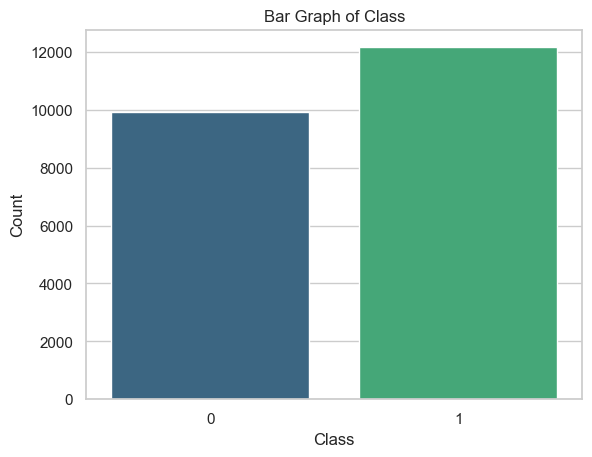

In [21]:
# visualize class distribution
sns.set(style="whitegrid")
sns.countplot(data=data, x='Class', palette='viridis')
plt.title('Bar Graph of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('figure1.png', dpi=300,bbox_inches='tight')
plt.show()

/var/folders/k9/c5v7fnr909n_832ky4wnxgm80000gn/T/ipykernel_34563/13479960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sector', palette='viridis')


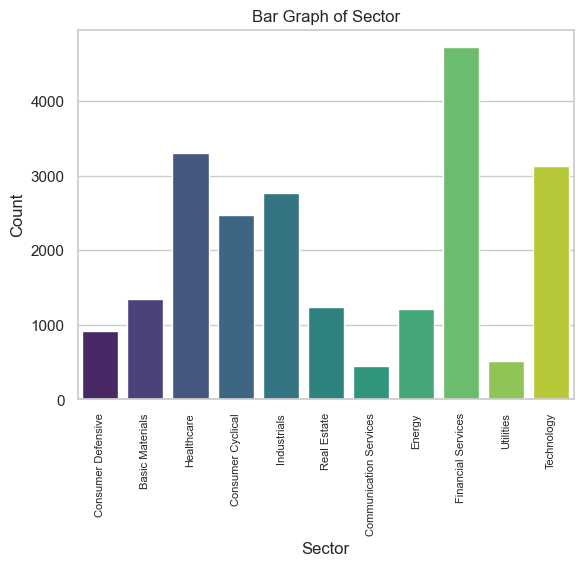

In [22]:
# visualize sector distribution
sns.set(style="whitegrid")
sns.countplot(data=data, x='Sector', palette='viridis')
plt.title('Bar Graph of Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=90,fontsize=8)
plt.savefig('figure2.png', dpi=300,bbox_inches='tight')
plt.show()

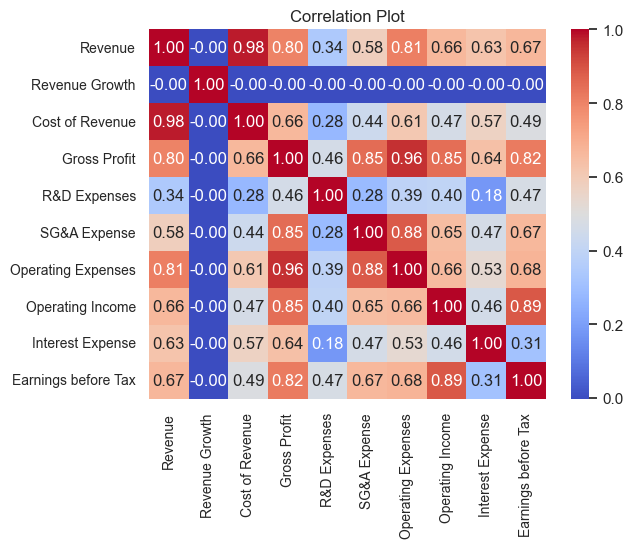

In [23]:
subset = data.iloc[:, :10]
subset_corr = subset.corr()
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.savefig('figure3.png', dpi=300,bbox_inches='tight')
plt.show()

## Basic Feature Engineering

In [12]:
# print correlation
numerical = [col for col in data.columns if data[col].dtype!='O']
correlation_matrix = data[numerical].corr()
print(correlation_matrix)

                              Revenue  Revenue Growth  Cost of Revenue  \
Revenue                      1.000000       -0.002762         0.978873   
Revenue Growth              -0.002762        1.000000        -0.002322   
Cost of Revenue              0.978873       -0.002322         1.000000   
Gross Profit                 0.803631       -0.002995         0.664948   
R&D Expenses                 0.342421       -0.001327         0.277569   
...                               ...             ...              ...   
Book Value per Share Growth -0.001580        0.000250        -0.001930   
Debt Growth                 -0.004237        0.000937        -0.003759   
R&D Expense Growth          -0.005282        0.000063        -0.004424   
SG&A Expenses Growth        -0.005087        0.000279        -0.004152   
Class                        0.021706       -0.006344         0.017588   

                             Gross Profit  R&D Expenses  SG&A Expense  \
Revenue                          0.803

In [13]:
upper_corr = np.triu(correlation_matrix)
upper_corr = pd.DataFrame(upper_corr)
upper_corr

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,1.0,-0.002762,0.978873,0.803631,0.342421,0.581138,0.810497,0.664840,0.626497,0.667234,...,0.066398,0.049766,-0.002403,-0.008144,-0.005637,-0.001580,-0.004237,-0.005282,-0.005087,0.021706
1,0.0,1.000000,-0.002322,-0.002995,-0.001327,-0.002722,-0.002880,-0.002662,-0.002699,-0.002629,...,-0.000076,-0.000826,0.006813,0.002319,0.000098,0.000250,0.000937,0.000063,0.000279,-0.006344
2,0.0,0.000000,1.000000,0.664948,0.277569,0.438070,0.610563,0.465968,0.567145,0.487396,...,0.052653,0.039019,-0.003491,-0.006340,-0.004605,-0.001930,-0.003759,-0.004424,-0.004152,0.017588
3,0.0,0.000000,0.000000,1.000000,0.460968,0.847257,0.956302,0.845929,0.638521,0.816913,...,0.075368,0.057078,-0.002513,-0.009369,-0.006254,-0.000436,-0.003987,-0.005491,-0.005503,0.030948
4,0.0,0.000000,0.000000,0.000000,1.000000,0.284509,0.389132,0.397971,0.180715,0.474353,...,0.030517,0.022071,-0.001681,-0.002503,-0.002864,-0.000180,-0.002030,-0.000822,-0.002117,0.034650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.008232,-0.002085,0.002437,-0.016437
218,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001347,0.025673,0.005874
219,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.006321,-0.001809
220,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.013750


In [14]:
to_drop = []

# Iterate through the upper traingular correlation matrix
for i in range(len(correlation_matrix.columns)-1):
    for j in range(i+1):
        item = upper_corr.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns

        if abs(item.values) >= 0.8: # threshold
            to_drop.append(col.values[0])

# Drop
data = data.drop(data.columns[to_drop], axis = 1)

In [16]:
missing_data = data.isnull().sum()
print(missing_data)

Revenue                        1171
Revenue Growth                 2088
R&D Expenses                   2138
Interest Expense               1719
Income Tax Expense             1588
                               ... 
Book Value per Share Growth    2864
Debt Growth                    2615
R&D Expense Growth             2479
Sector                            0
Class                             0
Length: 109, dtype: int64


In [17]:
observations = data.shape[0]
threshold = observations * 0.5
large_proportion_missing = missing_data[missing_data > threshold]
large_proportion_missing

Series([], dtype: int64)

In [18]:
# drop columns that have over 50% of missing data
data.drop(columns=large_proportion_missing.index, inplace=True)

In [19]:
# train test split for modeling
predictors = [col for col in data.columns if col != 'Class']
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Class'], test_size=0.2, random_state=42)

In [20]:
# standardize numeric features
scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_test.columns[:-1]] = scaler.transform(X_test[X_test.columns[:-1]])

# one-hot encode sector
X_train = pd.get_dummies(X_train, columns = ["Sector"])
X_test = pd.get_dummies(X_test, columns = ["Sector"])

# use knn to impute the rest of missing columns
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [32]:
# check missing data again
X_train.isnull().sum()

Revenue               0
Revenue Growth        0
R&D Expenses          0
Interest Expense      0
Income Tax Expense    0
                     ..
Sector_Healthcare     0
Sector_Industrials    0
Sector_Real Estate    0
Sector_Technology     0
Sector_Utilities      0
Length: 118, dtype: int64

## Modelling

In [21]:
Results = pd.DataFrame({'Metric': ['True Positives', 'False Positives', 'True Negatives', 'False Negatives', 'Train_Accuracy', 'Test_Accuracy', 'Train_AUC', 'Test_AUC']})

### Baseline (Majority Class Prediction)

In [27]:
# majority class is 1
baseline_pred = [1] * X_test.shape[0]

test_accuracy = accuracy_score(y_test, baseline_pred)
auc_test = roc_auc_score(y_test, baseline_pred)

print(test_accuracy)
print(auc_test)

0.5541213768115942
0.5


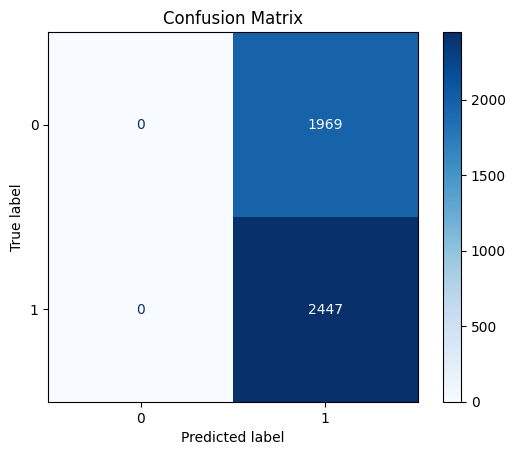

In [28]:
cm = confusion_matrix(y_test, baseline_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [29]:
Results['Baseline'] = [2447, 1969, 0, 0, None, 0.554, None, 0.5]

### Logistic Regression (CV)

In [34]:
lr = LogisticRegression(penalty='l2', max_iter = 10000)

param_grid = {
    'C' : [0.001,0.01,0.1,1,10]

}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

auc_train = roc_auc_score(y_train,y_train_pred)
auc_test = roc_auc_score(y_test,y_test_pred)

In [35]:
training_accuracy

0.5973614178132609

In [36]:
test_accuracy

0.5826539855072463

In [37]:
auc_train

0.5756047083414593

In [38]:
auc_test

0.5595262531643415

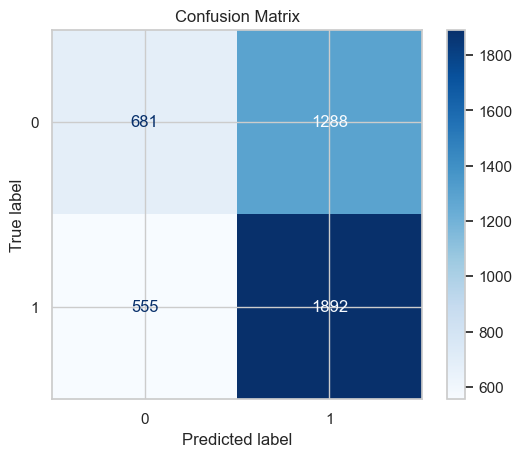

In [39]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [30]:
Results['Logistic Regression'] = [1897, 1291, 678, 550, 0.597, 0.583, 0.575, 0.560]

### CART (CV)

In [41]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth' : [5, 10, 15, 17],
    'min_samples_split': [5, 10, 20, 25],
    'min_samples_leaf': [5, 10, 20, 25]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

auc_train = roc_auc_score(y_train,y_train_pred)
auc_test = roc_auc_score(y_test,y_test_pred)

In [ ]:
training_accuracy

0.615197327444652

In [ ]:
test_accuracy

0.5978260869565217

In [ ]:
best_params

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 5}

In [ ]:
auc_train

0.5853019146668745

In [ ]:
auc_test

0.5651806100400092

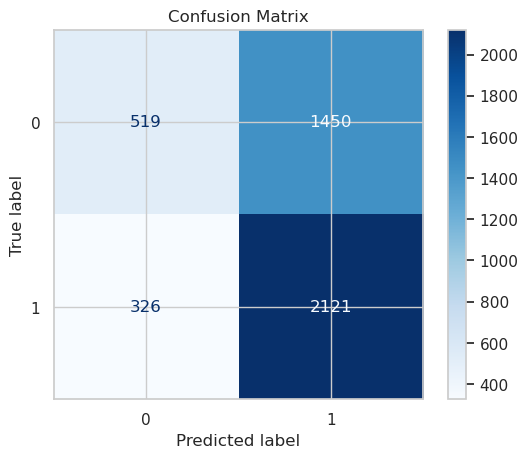

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [31]:
Results['CART'] = [2121, 1450, 519, 326, 0.615, 0.598, 0.585, 0.565]

### Random Forest (CV)

In [ ]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [25, 50]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

y_test_pred = best_model_rf.predict(X_test)
y_train_pred = best_model_rf.predict(X_train)

training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

auc_train = roc_auc_score(y_train,y_train_pred)
auc_test = roc_auc_score(y_test,y_test_pred)

print("training accuracy: ", training_accuracy)
print("test accuracy: ", test_accuracy)
print("AUC train: ", auc_train)
print("AUC test: ", auc_test)
print("best params: ", best_params)

training accuracy:  0.7689258818866429
test accuracy:  0.6068840579710145
AUC train:  0.7546165715517975
AUC test:  0.5852092808370362
best params:  {'max_depth': 20, 'min_samples_leaf': 25, 'n_estimators': 200}


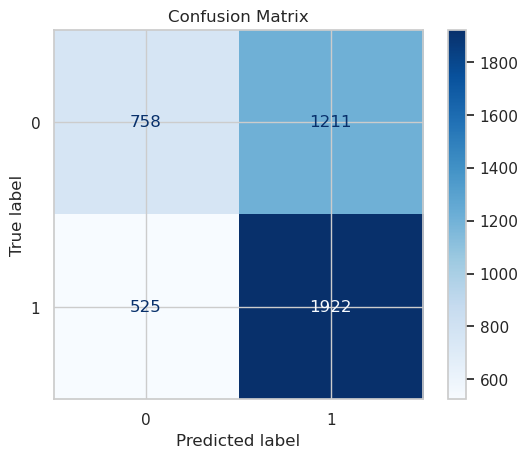

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [32]:
Results['Random Forest'] = [1922, 1211, 758, 525, 0.769, 0.607, 0.755, 0.585]

In [ ]:
feature_scores_rf = best_model_rf.feature_importances_
rf_features_df = pd.DataFrame({'Feature': X_train.columns, 'Scores': feature_scores_rf}).sort_values(by='Scores', ascending=False)
rf_features_df

,Feature,Scores
74,Earnings Yield,0.022600
12,EBITDA Margin,0.019589
39,priceEarningsRatio,0.018548
9,Weighted Average Shs Out,0.018156
27,Operating Cash Flow,0.017272
...,...,...
107,Sector_Basic Materials,0.000393
115,Sector_Real Estate,0.000375
108,Sector_Communication Services,0.000054
110,Sector_Consumer Defensive,0.000049


### XGBoost (CV)

In [ ]:
xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 8, 10, 12],
    'learning_rate': [0.005, 0.01, 0.1],
    'min_child_weight': [1, 5, 15]
}
    
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

y_test_pred = best_model_xgb.predict(X_test)
y_train_pred = best_model_xgb.predict(X_train)

training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

auc_train = roc_auc_score(y_train,y_train_pred)
auc_test = roc_auc_score(y_test,y_test_pred)

print("training accuracy: ", training_accuracy)
print("test accuracy: ", test_accuracy)
print("AUC train: ", auc_train)
print("AUC test: ", auc_test)
print("best params: ", best_params)

training accuracy:  0.8002944340637563
test accuracy:  0.6129981884057971
AUC train:  0.7880706905099084
AUC test:  0.5937520949461235
best params:  {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 15, 'n_estimators': 200}


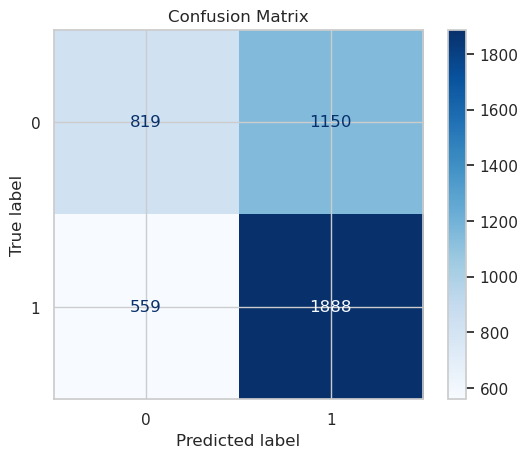

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [33]:
Results['XGBoost'] = [1888, 1150, 819, 559, 0.800, 0.613, 0.788, 0.594]

In [ ]:
feature_scores_xgb = best_model_xgb.get_booster().get_score(importance_type='weight')
xgb_features_df = pd.DataFrame(list(feature_scores_xgb.items()), columns=['Feature', 'Scores']).sort_values(by='Scores', ascending=False)
xgb_features_df

,Feature,Scores
37,priceBookValueRatio,539.0
32,Issuance (buybacks) of shares,524.0
46,niperEBT,523.0
1,Revenue Growth,518.0
103,Book Value per Share Growth,492.0
...,...,...
111,Sector_Industrials,17.0
6,Net Income - Discontinued ops,11.0
112,Sector_Real Estate,7.0
109,Sector_Financial Services,5.0


### Ensemble (RF + XGB)

In [ ]:
weights = [[1/4, 3/4], [1/3, 2/3], [1/2, 1/2], [2/3, 1/3], [3/4, 1/4]]

rf_pred = best_model_rf.predict(X_test)
xgb_pred = best_model_xgb.predict(X_test)

results = {'accuracy': [], 'auc': []}

for pair in weights:
    pred = pair[0] * rf_pred + pair[1] * xgb_pred
    pred = [1 if p >= 0.5 else 0 for p in pred]
    accuracy = accuracy_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test,y_test_pred)
    results['accuracy'].append(accuracy)
    results['auc'].append(auc)

ind = np.argmax(results['accuracy'])
print("best accuracy weight: ", weights[ind])
print("best accuracy: ", max(results['accuracy']))

ind = np.argmax(results['auc'])
print("best auc weight: ",weights[ind])
print("best auc: ", max(results['auc']))

best accuracy weight:  [0.25, 0.75]
best accuracy:  0.6157155797101449
best auc weight:  [0.25, 0.75]
best auc:  0.5961544727916959


In [ ]:
pred = 0.25 * rf_pred + 0.75 * xgb_pred
pred = [1 if p >= 0.5 else 0 for p in pred]

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [34]:
Results['Ensemble'] = [None, None, None, None, None, 0.616, None, 0.596]

In [35]:
Results

,Metric,Baseline,Logistic Regression,CART,Random Forest,XGBoost,Ensemble
0,True Positives,2447.000,1897.000,2121.000,1922.000,1888.000,NaN
1,False Positives,1969.000,1291.000,1450.000,1211.000,1150.000,NaN
2,True Negatives,0.000,678.000,519.000,758.000,819.000,NaN
3,False Negatives,0.000,550.000,326.000,525.000,559.000,NaN
4,Train_Accuracy,NaN,0.597,0.615,0.769,0.800,NaN
5,Test_Accuracy,0.554,0.583,0.598,0.607,0.613,0.616
6,Train_AUC,NaN,0.575,0.585,0.755,0.788,NaN
7,Test_AUC,0.500,0.560,0.565,0.585,0.594,0.596
